<a href="https://colab.research.google.com/github/maximmillion/ConvolutionExp/blob/main/CNN_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint

# Making the dataset:

In [2]:
# Create 250 squares
NUM_SQUARES = 250
WIDTH = 128

X_train = []
for i in range(NUM_SQUARES):
    exp = np.zeros((WIDTH, WIDTH)) #  128*128 canvas 
    x_start = randint(0, WIDTH - 1)
    x_end = randint(x_start, WIDTH)
    y_start = randint(0, WIDTH - 1)
    y_end = randint(y_start, WIDTH)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    X_train.append(exp)

In [3]:
# Create 250 circles
for i in range(NUM_SQUARES):
    x = np.arange(0, WIDTH)
    y = np.arange(0, WIDTH)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, WIDTH)
    cy = randint(0, WIDTH)
    r = randint(0, WIDTH / 2)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
    
X_train = np.array(X_train)
print(len(X_train))

500


In [14]:
# Labels for Circles and Squares 
# First 250 images(Squares) are labeled 1, the next 250(circles) are labeled 0
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])

## Splitting the Dataset:

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                                    stratify=Y_train, # ensures that %squares=circles in training/testing
                                                    test_size=0.2) # testing is 20% 

print(x_train.shape)
print(x_test.shape)

(400, 128, 128)
(100, 128, 128)


# Training:

## Creating the model:

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape

INPUT_SHAPE = (WIDTH, WIDTH)   

model = Sequential() # start of model
model.add(Reshape((WIDTH, WIDTH, 1), input_shape=INPUT_SHAPE)) # make from 2D into 3D
model.add(Conv2D(32, (3, 3))) # 32 convoltions with a 3*3 filter
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling is 2*2

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform')) #weight initialization technique 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # make 1D
model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dropout(0.5)) # dropout 50% of weights  

model.add(Dense(1)) # makes the prediction
model.add(Activation('sigmoid')) # Either 0/1 (since we have a binary output)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 128, 128, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 61, 61, 32)        0         
                                                      

## Compiling the model:

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

## Training the model:

In [19]:
history = model.fit(x_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1,  
                         epochs = 10,      
                         validation_data=(x_test, y_test),
                         shuffle = False # We already shuffled using stratify
                     )


Epoch 1/10
7/7 [==============================] - 8s 953ms/step - loss: 0.6316 - accuracy: 0.6775 - val_loss: 0.4192 - val_accuracy: 0.8100
Epoch 2/10
7/7 [==============================] - 6s 899ms/step - loss: 0.4535 - accuracy: 0.8150 - val_loss: 0.3486 - val_accuracy: 0.9300
Epoch 3/10
7/7 [==============================] - 7s 938ms/step - loss: 0.3602 - accuracy: 0.8475 - val_loss: 0.3189 - val_accuracy: 0.9300
Epoch 4/10
7/7 [==============================] - 6s 906ms/step - loss: 0.2049 - accuracy: 0.9150 - val_loss: 0.3084 - val_accuracy: 0.8800
Epoch 5/10
7/7 [==============================] - 6s 878ms/step - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.3035 - val_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 6s 902ms/step - loss: 0.1151 - accuracy: 0.9575 - val_loss: 0.3038 - val_accuracy: 0.9100
Epoch 7/10
7/7 [==============================] - 6s 890ms/step - loss: 0.0845 - accuracy: 0.9675 - val_loss: 0.3121 - val_accuracy: 0.9400
Epoch 8/10
7/7 [====

## Visualizing Results:

### Loss:

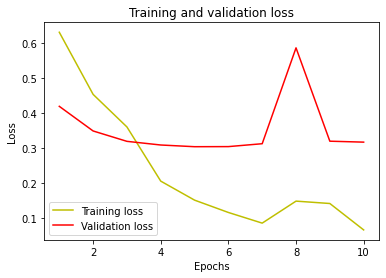

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy: 

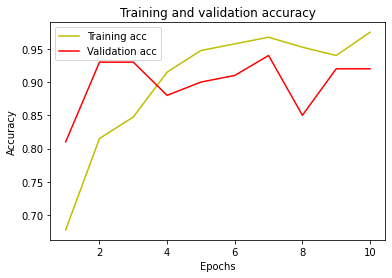

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Taking a prediction:

The prediction for this image is:  [[0.51196194]]
The actual label for this image is:  1


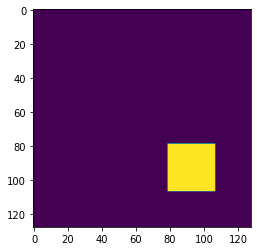

In [33]:
n = 99  #Select the index of image to be loaded for testing (You can choose any 0-99)
img = x_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y)

print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])